<a href="https://colab.research.google.com/github/Kuber757/Recommender-Systems/blob/main/Recommender_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiential Learning**
**Assignment 3 & 4**
Kuber Bansal


Importing swifter to increase the efficiency of pandas operations.

In [1]:
!pip install swifter
!pip install tensorflow==2.0.0

     |████████████████████████████████| 634kB 8.7MB/s 
     |████████████████████████████████| 471kB 12.6MB/s 
     |████████████████████████████████| 542kB 23.2MB/s 
     |████████████████████████████████| 92kB 6.8MB/s 
     |████████████████████████████████| 17.2MB 233kB/s 
     |████████████████████████████████| 23.1MB 57.5MB/s 
     |████████████████████████████████| 133kB 40.7MB/s 
     |████████████████████████████████| 2.9MB 44.9MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 1.3MB 34.8MB/s 
     |████████████████████████████████| 204kB 43.2MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 296kB 46.6MB/s 
     |████████████████████████████████| 143kB 47.9MB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
  Created wheel for swifter: filename=swifter-1.0.7-cp36-n

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

# DATA IMPORTING

In [3]:
!mkdir .kaggle

In [7]:
import json
token = {"username":"kuberbansal","key":"5fac0619261f8f657e7056986039a58b"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [8]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [9]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [10]:
!kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  428KB  2020-11-20 10:47:51           6809  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          3MB  2020-11-20 06:04:06           3068  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           3016  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            549  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

In [12]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small -p /content

fashion-product-images-small.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/5813.jpg  
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/image

In [14]:
DATASET_PATH = "myntradataset/"

FINAL DATA SET

In [15]:
df = pd.read_csv(DATASET_PATH + "styles.csv",nrows=5000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


CHECKING FOR NULL VALUES

In [50]:
# print(df.info())
df = df.dropna(axis=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4951 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4951 non-null   int64  
 1   gender              4951 non-null   object 
 2   masterCategory      4951 non-null   object 
 3   subCategory         4951 non-null   object 
 4   articleType         4951 non-null   object 
 5   baseColour          4951 non-null   object 
 6   season              4951 non-null   object 
 7   year                4951 non-null   int64  
 8   usage               4951 non-null   object 
 9   productDisplayName  4951 non-null   object 
 10  image               4951 non-null   object 
 11  tsne-2d-one         4951 non-null   float32
 12  tsne-2d-two         4951 non-null   float32
dtypes: float32(2), int64(2), object(9)
memory usage: 502.8+ KB
None


Graphs to represent the frequencies of the available features and its categories.

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image',
       'tsne-2d-one', 'tsne-2d-two'],
      dtype='object')


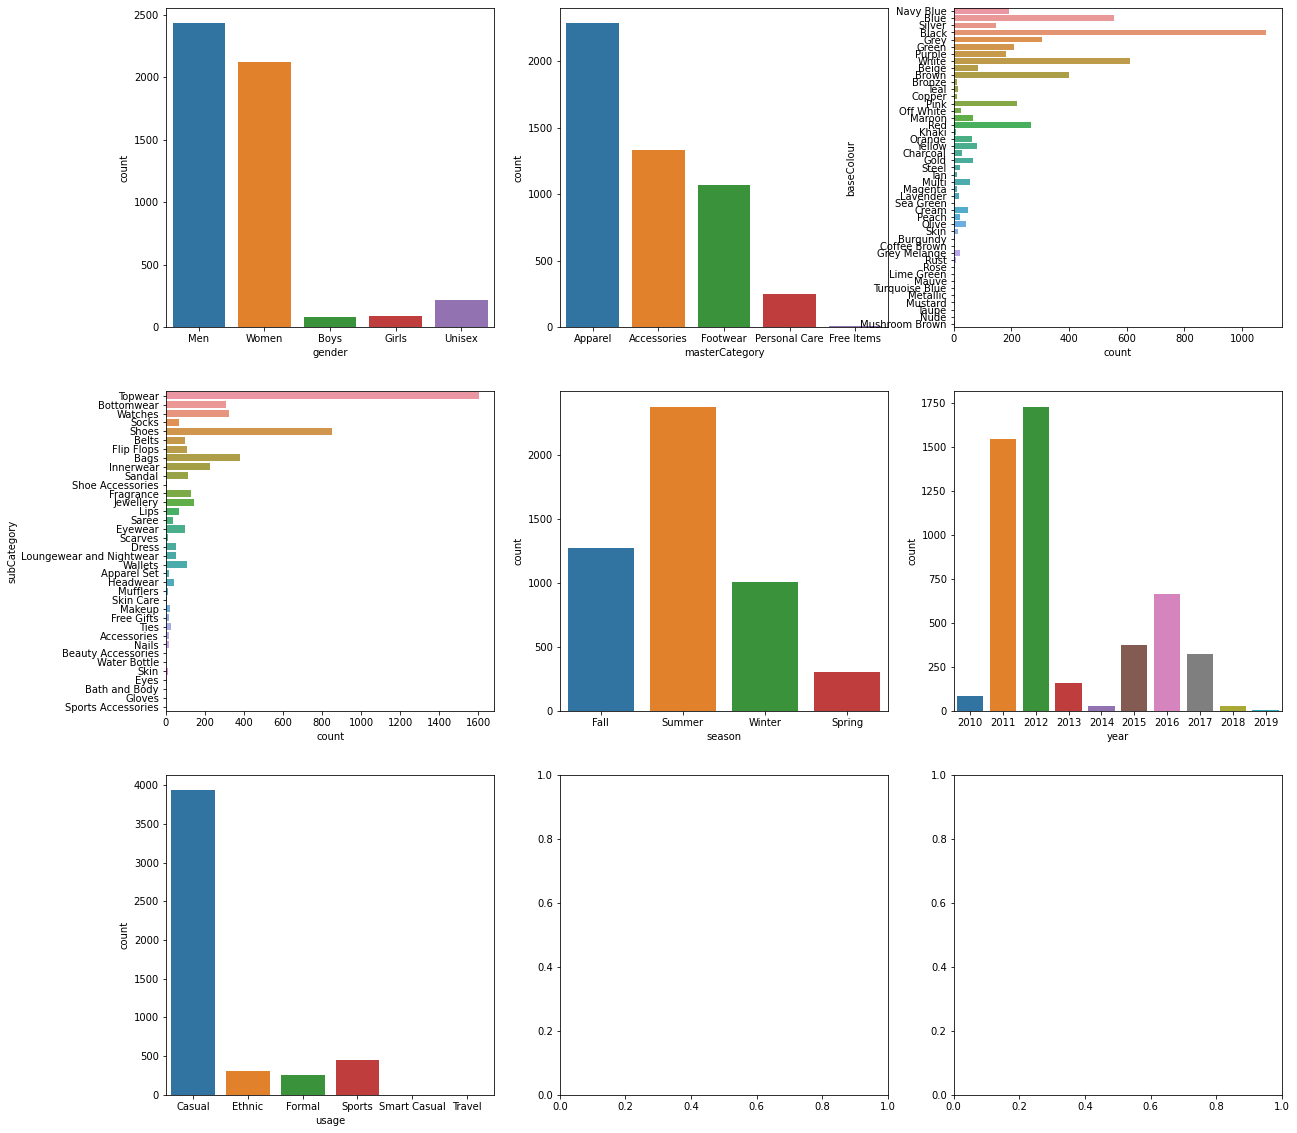

In [53]:
print(df.columns)
f, axes = plt.subplots(3, 3, figsize=(20,20))
sns.countplot(x="gender", data=df, ax=axes[0,0])
sns.countplot(x="masterCategory", data=df, ax=axes[0,1])
sns.countplot(y="baseColour", data=df, ax=axes[0,2])

sns.countplot(y="subCategory", data=df, ax=axes[1,0])
sns.countplot(x="season", data=df, ax=axes[1,1])
sns.countplot(x="year", data=df, ax=axes[1,2])

sns.countplot(x="usage", data=df, ax=axes[2,0])

In [17]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() 
    
def img_path(img):
    return DATASET_PATH + "/images/"+img

def load_image(img):
    return cv2.imread(img_path(img))

Printing few sample images.

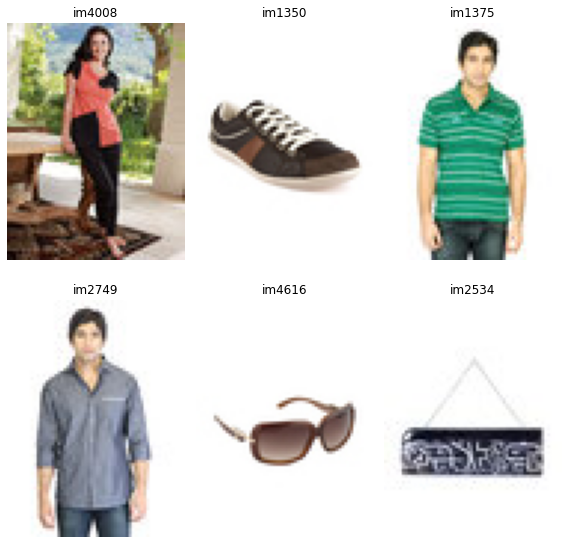

In [18]:
import matplotlib.pyplot as plt
import numpy as np

figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
plot_figures(figures, 2, 3)

Graph between count and articleType.

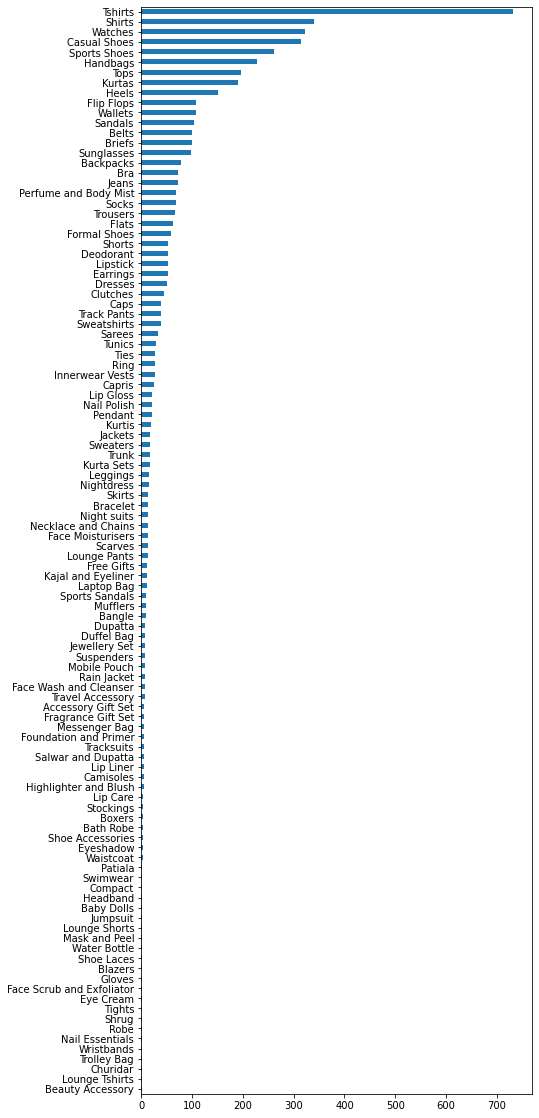

In [19]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

In [20]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D
tf.__version__

'2.0.0'

Importing a pre-trained ResNet50 model with weights from ImageNet dataset for proper identification od similar products.
Adding a GlobalMaxPooling2D layer for fine tuning for our given data set.

In [21]:
img_width, img_height, _ = load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

94773248/94765736 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 3, 2, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [57]:
from tensorflow import keras

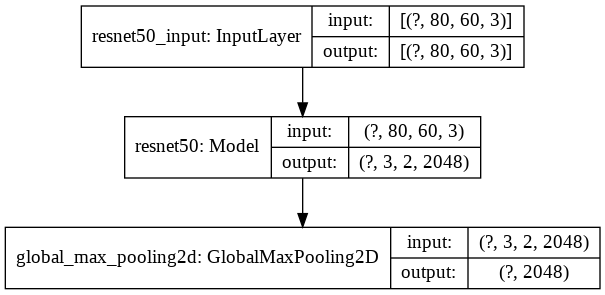

In [58]:
keras.utils.plot_model(model, show_shapes=True)

Function to process image by converting it to array, expanding dimenssions and then passing it through model.predict to get the category

In [22]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [23]:
emb = get_embedding(model, df.iloc[1].image)
emb.shape

(2048,)

[1.8793373  1.6008819  0.09202814 ... 3.2688875  2.271732   5.433382  ]


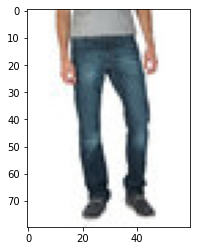

In [24]:
plt.imshow(cv2.cvtColor(load_image(df.iloc[1].image), cv2.COLOR_BGR2RGB))
print(emb)

In [25]:
import swifter

In [26]:
%%time
import swifter

# Parallel apply
map_embeddings = df['image'].swifter.apply(lambda img: get_embedding(model, img))
df_embs = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()


(5000, 2048)
CPU times: user 10min 40s, sys: 37 s, total: 11min 17s
Wall time: 7min 8s


getting cosine similarity between all the elements, a matrix.

In [27]:

from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.99999934, 0.5813052 , 0.23863798, 0.49294072],
       [0.5813052 , 0.99999875, 0.23951322, 0.7227346 ],
       [0.23863798, 0.23951322, 1.        , 0.22011638],
       [0.49294072, 0.7227346 , 0.22011638, 1.        ]], dtype=float32)

Function to return Top n images having the maximum cosine similarity with the given input image.

In [28]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, df, top_n = 5)

(Int64Index([259, 4305, 0, 2779, 2701], dtype='int64'),
 [0.90409726, 0.89255154, 0.89175576, 0.88555026, 0.88129294])

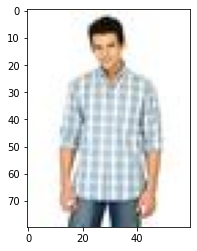

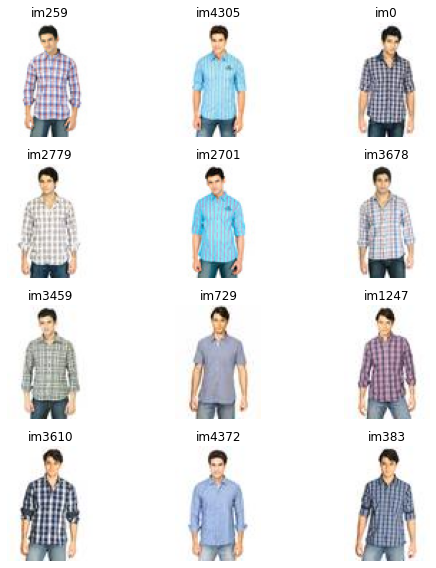

In [47]:
idx_ref = 2993

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 12)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 4,3)

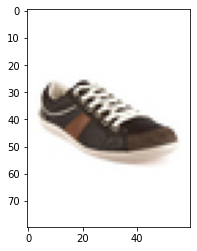

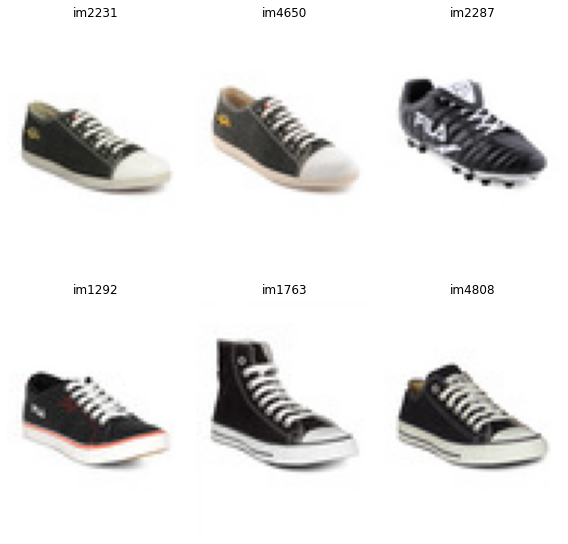

In [48]:
idx_ref = 1350

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [31]:
from sklearn.manifold import TSNE
import time
import seaborn as sns

In [32]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


In [ ]:
Applying TSNE on the given data

In [33]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_embs)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 143.1675043106079 seconds


In [34]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

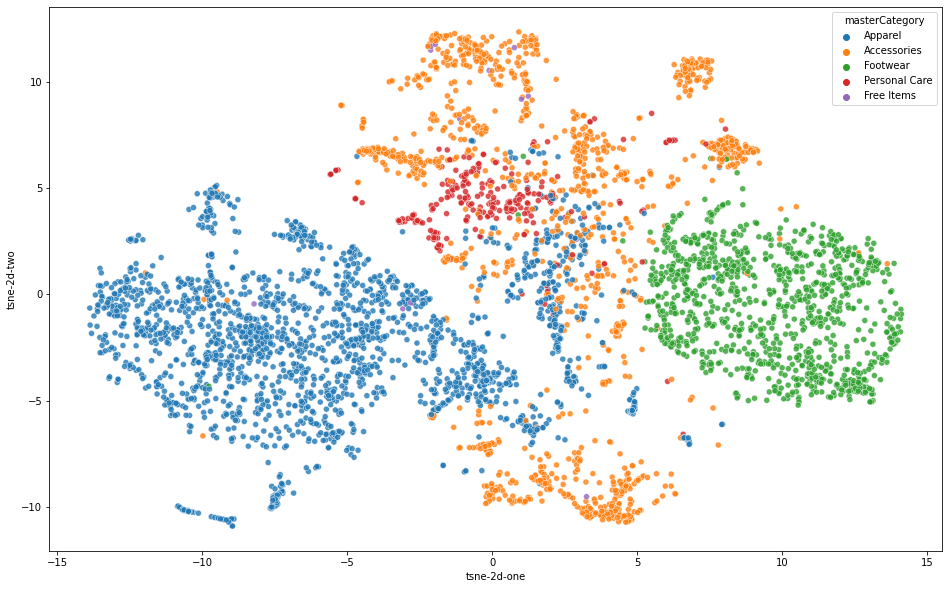

In [35]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="masterCategory",
                data=df,
                legend="full",
                alpha=0.8)

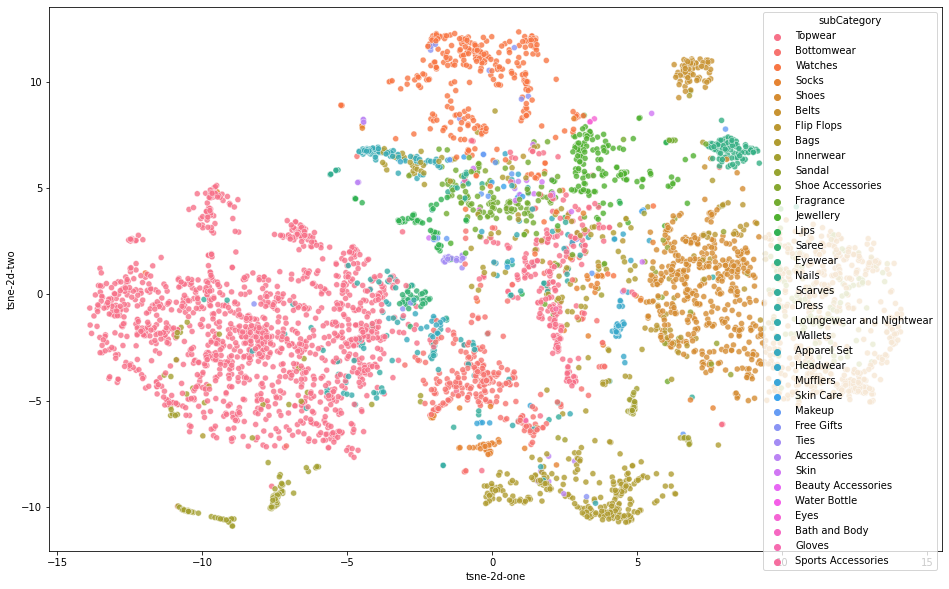

In [36]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="subCategory",
                data=df,
                legend="full",
                alpha=0.8)

In [37]:
df.sample(100).to_csv('df_sample.csv')
df_embs.to_csv('embeddings.csv')
df.to_csv('metadados.csv')